This notebook demonstrates how torque-limited and collision-free robot trajectories can be learnt using the the safemotions package. <br>
Note: Colab does not provide a display server, however, it is possible to render videos of the generated movements. 
When running the package on your local machine, you can add the command line argument "--use_gui" for instantaneous visualization. 

The robots in the following examples are controlled by neural networks that are trained to reach as many randomly sampled target points as possible.    


In [1]:
# First step: install the safemotions[train] package via pip
! pip install pybullet==3.1.6
! pip install safemotions[train]
! pip install gputil
%matplotlib inline
# Use a renderer with hardware acceleration provided that a GPU is available. 
import GPUtil
renderer = "egl" if len(GPUtil.getGPUs()) > 0 else "cpu"
if renderer == "cpu":
  print("Using CPU renderer.")
else:
  print("Using GPU renderer.")

Using GPU renderer.


Run the following code to render a video in which a single robot attempts to reach target points without touching the table on which it is mounted, a monitor, and four virtual walls around the table. <br>
Note: Since the virtual walls around the robot are transparent, only the GPU-based renderer can be used for this example. <br>
When a robot link flashes  <font color='#ff5400'>orange</font>, an alternative safe behavior is executed to avoid a torque limit violation. <font color='#75052d'>Red</font> and <font color='#0000aa'>blue</font> flashing indicates that an alternative safe behavior is performed to prevent a collision with another robot link and a static obstacle, respectively. 



2021-05-19 12:44:15,942	ERROR worker.py:682 -- Calling ray.init() again after it has already been called.
2021-05-19 12:44:15,956	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO:root:Lin

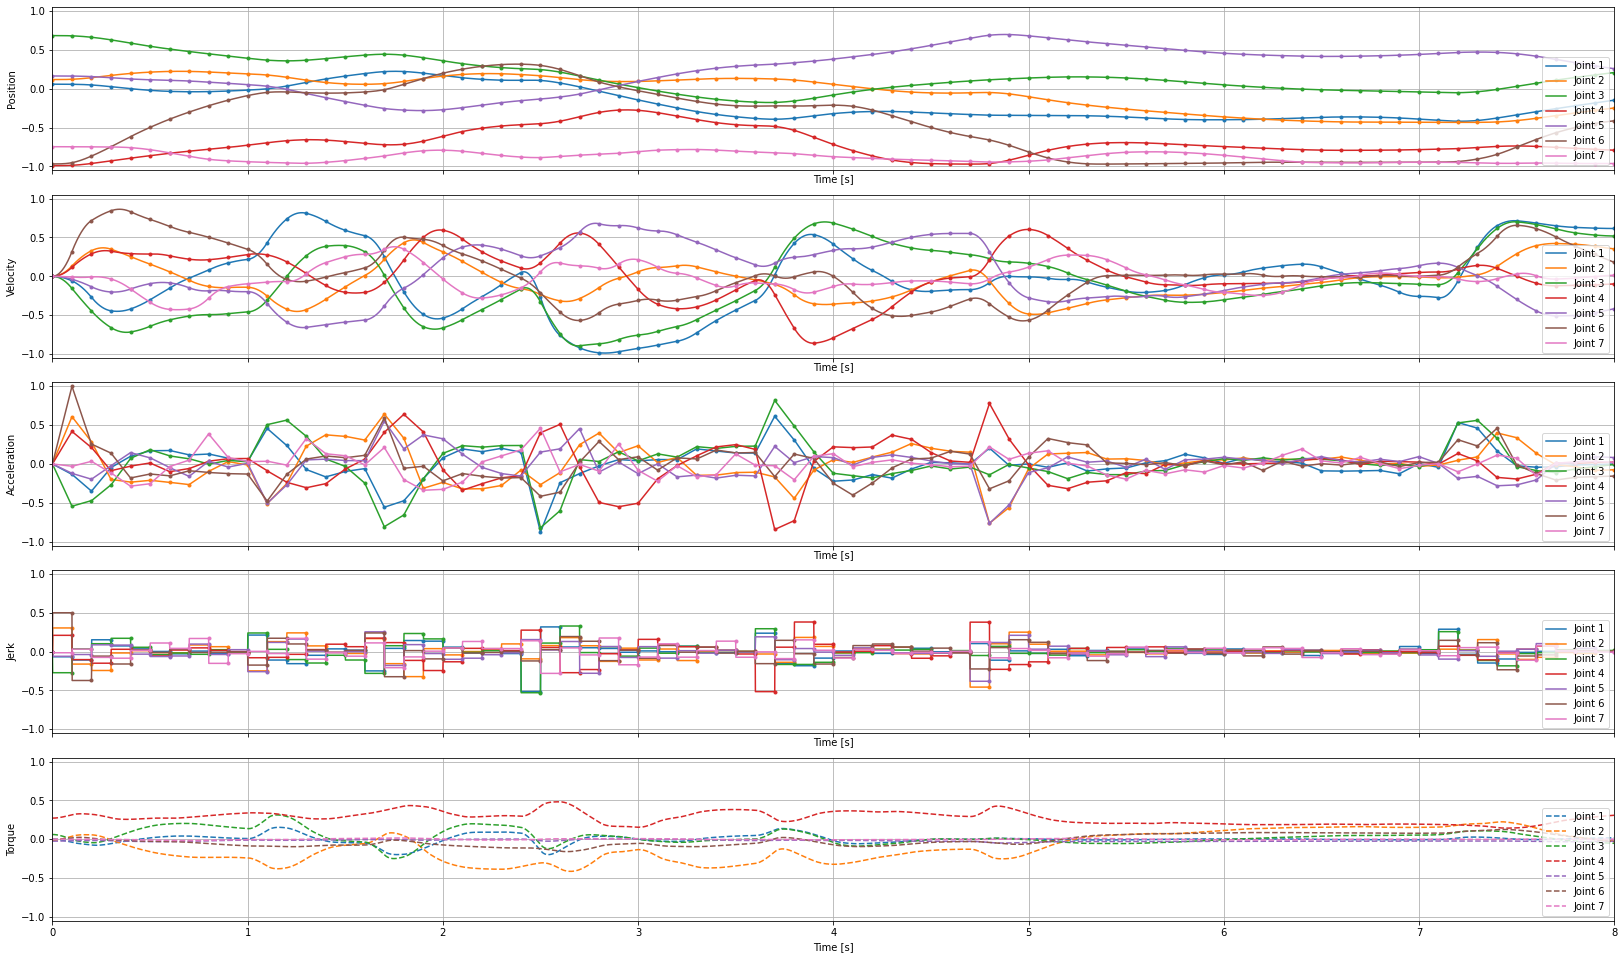

INFO:root:Last episode took 24.824695587158203 seconds
INFO:root:Trajectory duration: 8.0 seconds
INFO:root:Episode reward: 69.97447412899798
INFO:root:Computed 1 episodes in 26.770382165908813 seconds.
INFO:root:Mean computation time: 24.824695587158203 seconds, Max computation time: 24.824695587158203 seconds.


In [4]:
import os, safemotions
from IPython.display import HTML, display
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
video_height = 720
video_frame_rate = 24
video_width = int(16/9 * video_height)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  print("This example requires a GPU-based renderer as the walls around the robot are transparent. Unfortunately, transparency is not supported by the cpu renderer. Try to run the other examples instead.")
else:
  %run -G "$evaluate_script" --checkpoint=one_robot/P_CT_S_5_J_A --online_trajectory_duration=8.0 --plot_trajectory --plot_actual_torques --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
  video_filename = os.path.join("/content", "episode_1.mp4")
  video_file = open(video_filename,'rb').read()
  url = "data:video/mp4;base64," + b64encode(video_file).decode()
  display(HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url)))

Movements for two robots with alternating target points can be generated by running the code below. The color of each target point indicates the robot to which the target point is assigned. 

2021-05-19 13:41:04,922	ERROR worker.py:682 -- Calling ray.init() again after it has already been called.
2021-05-19 13:41:04,932	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter_r0 Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0_r0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1_r0 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO

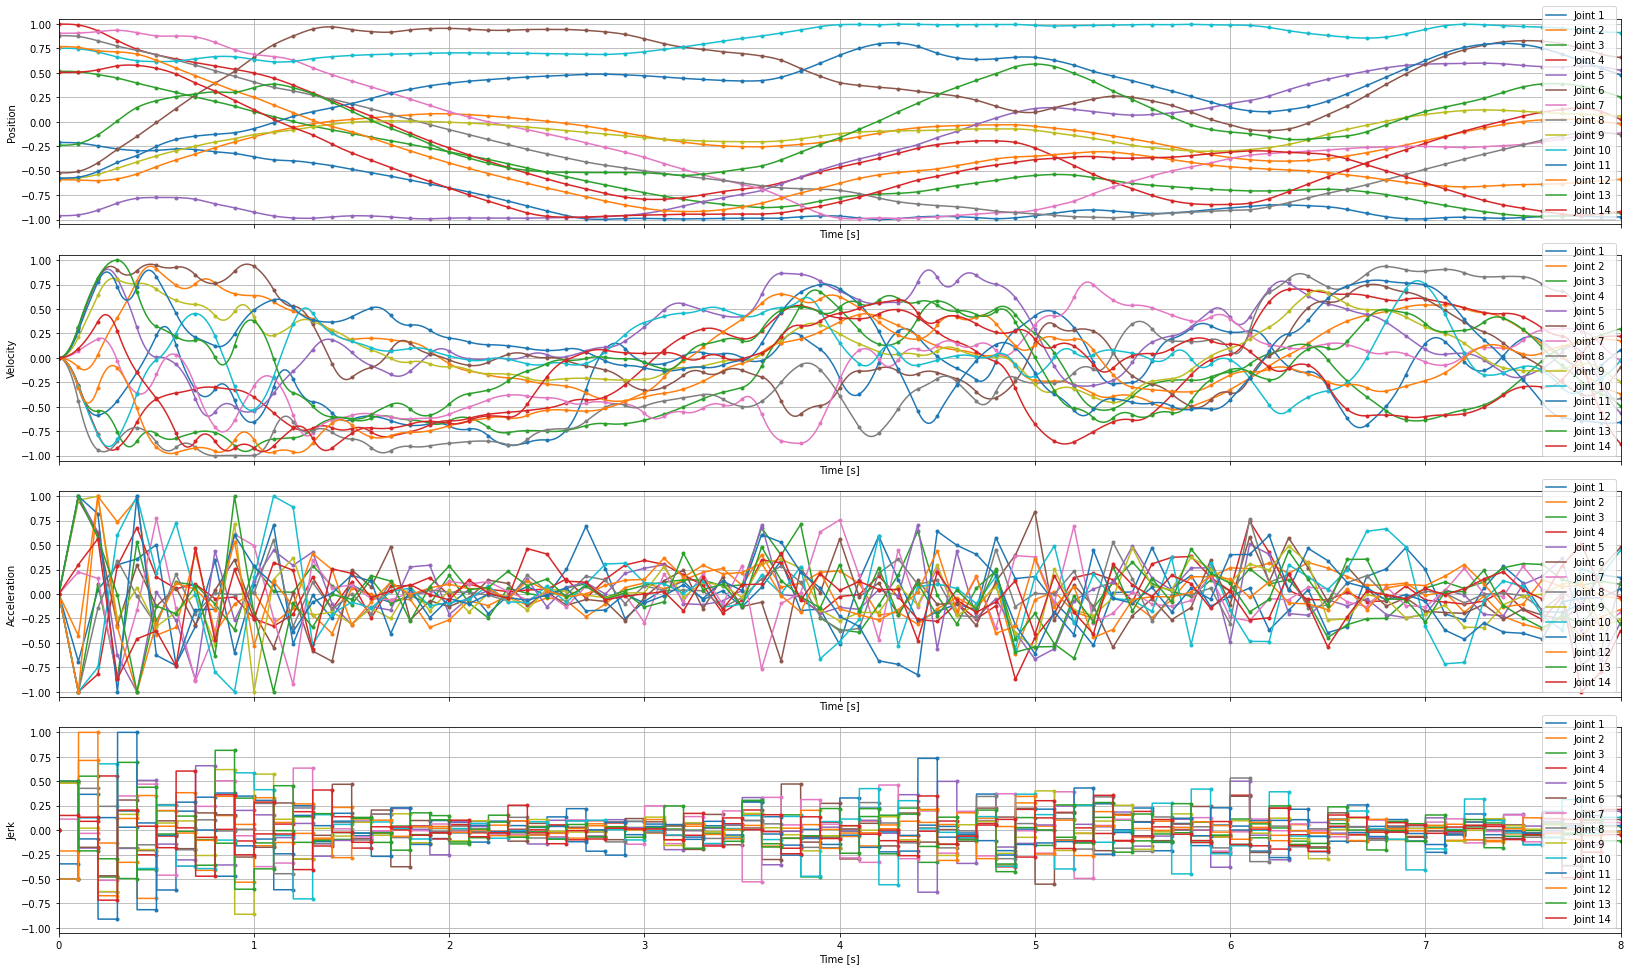

INFO:root:Last episode took 43.091450452804565 seconds
INFO:root:Trajectory duration: 8.0 seconds
INFO:root:Episode reward: 45.16099222621925
INFO:root:Computed 1 episodes in 45.85169553756714 seconds.
INFO:root:Mean computation time: 43.091450452804565 seconds, Max computation time: 43.091450452804565 seconds.


In [10]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$evaluate_script" --checkpoint=two_robots/P_C_S_1_J_A_D_5_T_A --online_trajectory_duration=8.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))

Finally, collision-free trajectories for three robots can be generated by running the following code. Note: Running the cell takes around 85 seconds. 

2021-05-19 12:55:47,754	ERROR worker.py:682 -- Calling ray.init() again after it has already been called.
2021-05-19 12:55:47,765	WARNING deprecation.py:30 -- DeprecationWarning: `sample_batch_size` has been deprecated. Use `rollout_fragment_length` instead. This will raise an error in the future!
INFO:root:Link 0 table Mass: 600.0 COM pos: (0.0, 0.0, -0.18746) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (130.36040000000003, 74.2804, 200.5604)
INFO:root:Link 1 iiwa_base_adapter_r0 Mass: 1.0 COM pos: (0.0, 0.0, 0.0) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.008912666666666666, 0.008912666666666666, 0.017712666666666668)
INFO:root:Link 2 iiwa_link_0_r0 Mass: 5.0 COM pos: (-0.01, 0.0, 0.07) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.03009836448700693, 0.031921115241897266, 0.039838995826307746)
INFO:root:Link 3 iiwa_link_1_r0 Mass: 3.4525 COM pos: (0.0, -0.03, 0.12) COM orn: (0.0, -0.0, 0.0) Inertia diagonal: (0.030780313915615736, 0.026325579332033302, 0.016050690713148415)
INFO

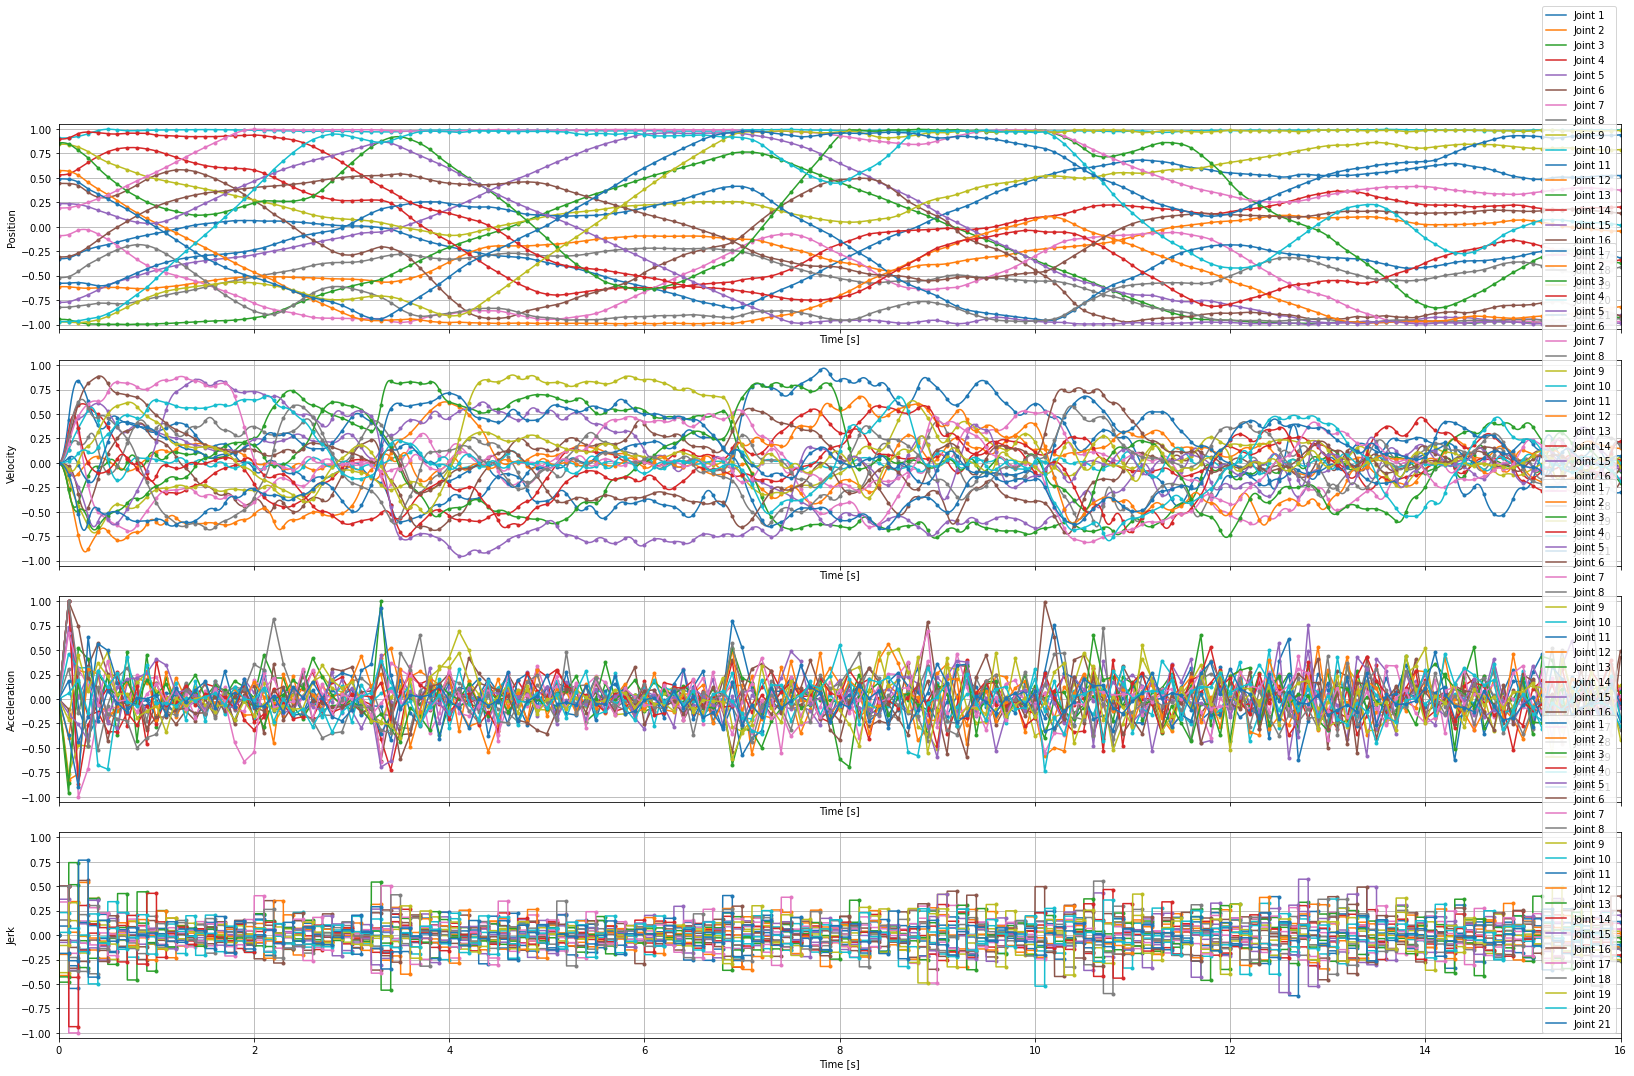

INFO:root:Last episode took 82.51484084129333 seconds
INFO:root:Trajectory duration: 16.0 seconds
INFO:root:Episode reward: 45.41550545045065
INFO:root:Computed 1 episodes in 84.9798686504364 seconds.
INFO:root:Mean computation time: 82.51484084129333 seconds, Max computation time: 82.51484084129333 seconds.


In [9]:
import os, safemotions
from IPython.display import HTML
from base64 import b64encode
package_dir = os.path.dirname(safemotions.__file__)
evaluate_script = os.path.join(package_dir, "evaluate.py")
if renderer == "cpu":
  video_height = 360
  video_frame_rate = 15
else:
  video_height = 720
  video_frame_rate = 24
video_width = int(16/9 * video_height)

%run -G "$evaluate_script" --checkpoint=three_robots/P_C_S_1_J_A_D_5_T_A --online_trajectory_duration=16.0 --plot_trajectory --episodes=1 --render --renderer=$renderer --video_frame_rate=$video_frame_rate --camera_angle=8 --video_height=$video_height --video_dir="/content"
video_filename = os.path.join("/content", "episode_1.mp4")
video_file = open(video_filename,'rb').read()
url = "data:video/mp4;base64," + b64encode(video_file).decode()
HTML("""<video width="%s" controls><source src="%s" type="video/mp4"></video>""" % (video_width, url))